## Challenge
Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

1. Vanilla logistic regression
2. Ridge logistic regression
3. Lasso logistic regression


## Data

Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow

**content**

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. 

## Data exploration

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('weatherAUS.csv')
print(df.shape)
df.head()

(142193, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [134]:
# You should exclude the variable Risk-MM when training a binary classification model. 
#Not excluding it will leak the answers to your model and reduce its predictability.
df_drop=df.drop('RISK_MM', axis=1)
df_drop=df_drop.dropna()

df_drop.shape

(56420, 23)

In [135]:
# Only display categorical features
df_drop.select_dtypes(include='object').head()
# Using Data features by making into seasons, months

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
5939,2009-01-01,Cobar,SSW,ENE,SW,No,No
5940,2009-01-02,Cobar,S,SSE,SSE,No,No
5942,2009-01-04,Cobar,NNE,NNE,NNW,No,No
5943,2009-01-05,Cobar,WNW,WNW,WSW,No,No
5944,2009-01-06,Cobar,WNW,NW,WNW,No,No


In [136]:
# Describe numerical features
df_drop.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


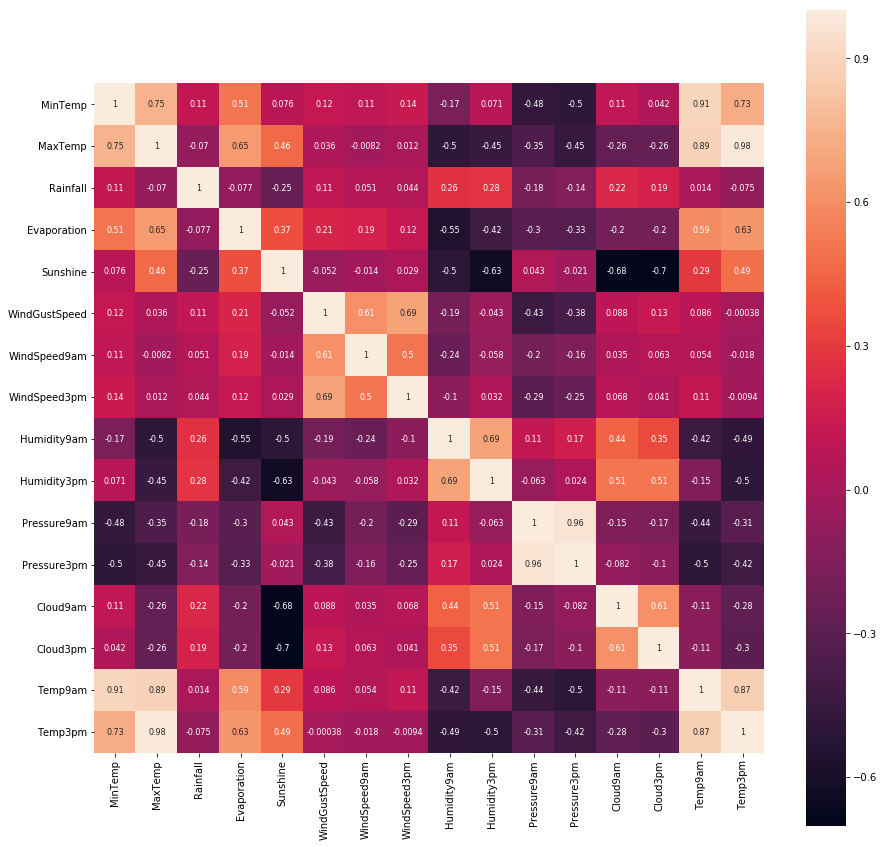

In [137]:
# Display heatmap only for numerical features
corrmat=df_drop.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, square=True, annot_kws={'size':8})

It seems that there are some highly correlated features. In order to deal with this multicollinearity, Variance Inflation Factor was calculated. Features which have VIF value less than 5 are considered as safe. 

In [138]:
# Calculating Variance Inflation Factor to deal with multicollinearity for numerical features

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#get names of numerical features
nums=df_drop.select_dtypes(include='float64').columns
#gather features
features = "+".join(nums)

#get y and X dataframes based on this regression
y, X = dmatrices('C(RainTomorrow) ~' +features,df_drop,return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#get features whose VIF is less than 5
nums=vif[vif['VIF Factor'] <= 5]['features']
nums

3          Rainfall
4       Evaporation
5          Sunshine
6     WindGustSpeed
7      WindSpeed9am
8      WindSpeed3pm
9       Humidity9am
13         Cloud9am
14         Cloud3pm
Name: features, dtype: object

I got 9 numerical features after excluding high VIF features. 

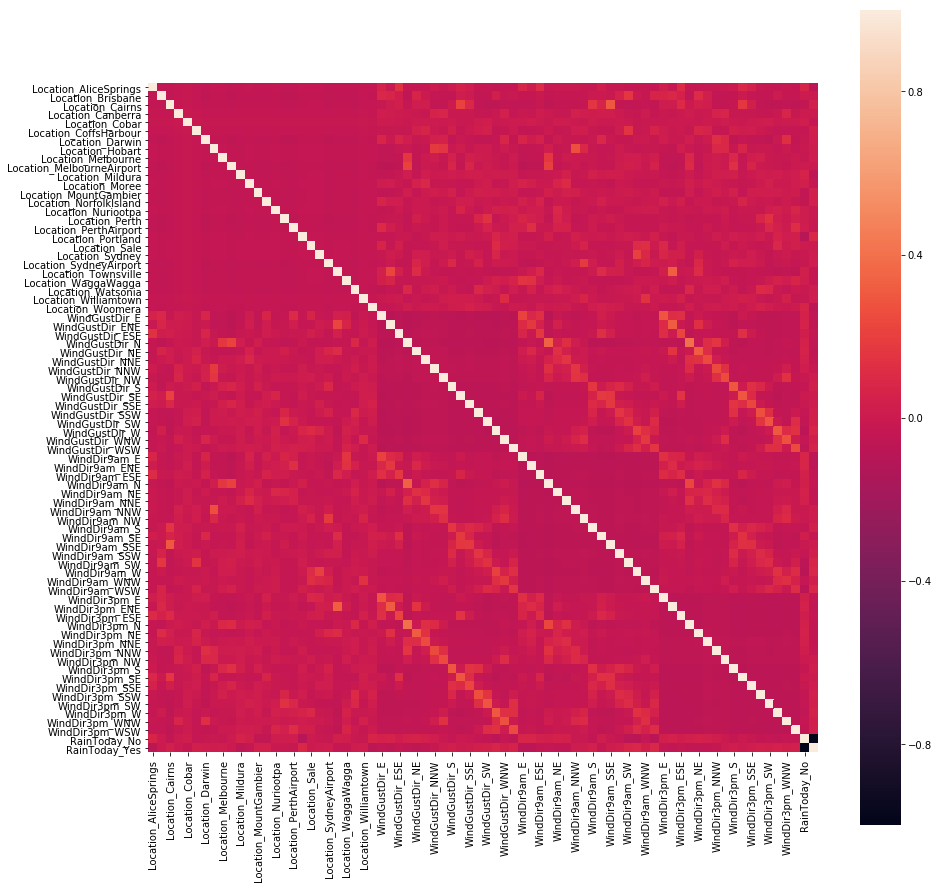

In [139]:
#Look into categorical features
cats=df_drop.select_dtypes(include='object').columns
df_cat=df_drop.select_dtypes(include='object').drop(['Date','RainTomorrow'],axis=1)
df_cat=pd.get_dummies(df_cat)

plt.figure(figsize=(15,15))
sns.heatmap(df_cat.corr(),square=True)

There is no multicollinearity issue among the categorical features.

In [140]:
# combine numerical and categorical features

df_features=pd.concat([df_drop[list(nums)],df_cat],axis=1)
df_features.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Cloud9am,Cloud3pm,Location_AliceSprings,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
5939,0.0,12.0,12.3,48.0,6.0,20.0,20.0,2.0,5.0,0,...,0,0,0,0,1,0,0,0,1,0
5940,0.0,14.8,13.0,37.0,19.0,19.0,30.0,1.0,1.0,0,...,0,0,1,0,0,0,0,0,1,0
5942,0.0,10.8,10.6,46.0,30.0,15.0,42.0,1.0,6.0,0,...,0,0,0,0,0,0,0,0,1,0
5943,0.0,11.4,12.2,31.0,6.0,6.0,37.0,1.0,5.0,0,...,0,0,0,0,0,0,0,1,1,0
5944,0.0,11.2,8.4,35.0,17.0,13.0,19.0,1.0,6.0,0,...,0,0,0,0,0,0,1,0,1,0


Features are ready, let's do some regressions.

## Ridge Logistic Regression
I tested 4 different level of alpha (0.001, 0.01, 0.1, 1) in ridge regularization.

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
alpha=[0.001, 0.01, 0.1, 1]
cv=[]
for C in alpha:
    print('Alpha is ',C)
    # Ridge regression
    lr = LogisticRegression(penalty='l2',C=C,random_state=1)
    X=df_features
    Y=np.where(df_drop['RainTomorrow']=='Yes',1,0)

    # Fit the model.
    fit = lr.fit(X, Y)

    # Display.
    print('Coefficients')
    print(fit.coef_)
    print(fit.intercept_)
    pred_y_sklearn = lr.predict(X)
    fit.coef_
    print('\n Accuracy by admission status')
    print(pd.crosstab(pred_y_sklearn, Y))

    print('\n Cross validation')
    xcv=cross_val_score(lr,X,Y,cv=10)
    cv.append(xcv)
    print(xcv)

Alpha is  0.001
Coefficients
[[ 2.79012577e-02 -2.39938440e-02 -2.92643921e-01  4.73756606e-02
  -2.54230382e-02 -1.50989137e-02 -1.19513407e-03 -6.41725221e-02
   9.22277687e-02 -9.65416620e-02  1.03073678e-01  1.84882219e-01
  -4.27721409e-02 -2.55676900e-02  8.74689685e-02  1.46634043e-01
  -1.27209015e-01 -9.19102028e-02 -1.73489235e-01 -1.24083039e-01
  -4.14576157e-02  3.19750967e-03  1.05615089e-01 -5.46369802e-02
   8.50986138e-02  1.07543966e-02  8.38325443e-02 -8.45446663e-02
  -2.30737865e-06 -2.86308768e-02  1.10514208e-02 -4.56847077e-02
  -9.70324463e-02  2.09818436e-02 -1.02922429e-01 -3.62493801e-02
  -1.12247701e-02 -3.78797610e-02 -3.39787173e-02  2.91664334e-02
   3.36112361e-02  4.99205870e-03  2.14388511e-02 -7.03547306e-02
  -2.59397582e-02 -4.14679500e-02 -5.78501173e-02 -6.53613587e-02
  -2.91650986e-02  5.81852565e-02 -3.18168814e-02 -5.09510676e-02
   3.66984674e-03 -5.88199350e-02  5.41567281e-02  1.55557344e-02
   9.58918566e-02  7.20007989e-03 -3.57253608e-

Text(0, 0.5, 'mean cross validation accuracy')

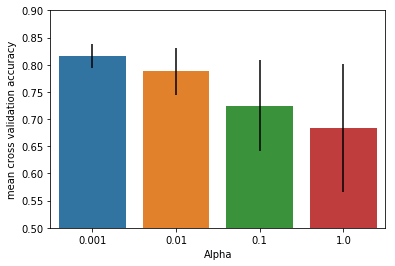

In [154]:
mcv=[]
vcv=[]
for xcv in cv:
    mcv.append(xcv.mean())
    vcv.append(xcv.std())
sns.barplot(alpha,mcv,yerr=vcv)
plt.ylim([0.5,0.9])
plt.xlabel('Alpha')
plt.ylabel('mean cross validation accuracy')

Small alpha means more strict regularization. It seems strong penalty led to the highest accuracy and the smallest variance for each fold in ridge logistic regression. 

## Lasso Logistic Regression

In [155]:
# Lasso regression
alpha=[0.001, 0.01, 0.1, 1]
cv=[]
for C in alpha:
    print('Alpha is ',C)
    lr = LogisticRegression(penalty='l1',C=C,random_state=1)
    X=df_features
    Y=np.where(df_drop['RainTomorrow']=='Yes',1,0)

    # Fit the model.
    fit = lr.fit(X, Y)

    # Display.
    print('Coefficients')
    print(fit.coef_)
    print(fit.intercept_)
    pred_y_sklearn = lr.predict(X)
    fit.coef_
    print('\n Accuracy by admission status')
    print(pd.crosstab(pred_y_sklearn, Y))

    print('\n Cross validation')
    xcv=cross_val_score(lr,X,Y,cv=10)
    cv.append(xcv)
    print(xcv)

Alpha is  0.001
Coefficients
[[ 0.04379903 -0.03111065 -0.30885747  0.04224842 -0.02318217 -0.01143265
  -0.0039374  -0.02389009  0.0234007   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.05840086
   0.        ]]
[0.]

 Accuracy

Text(0, 0.5, 'mean cross validation accuracy')

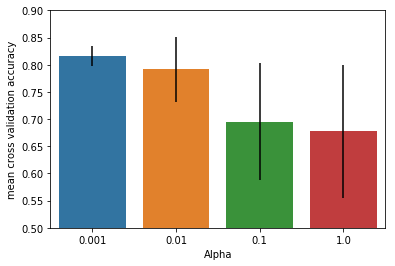

In [156]:
mcv=[]
vcv=[]
for xcv in cv:
    mcv.append(xcv.mean())
    vcv.append(xcv.std())
sns.barplot(alpha,mcv,yerr=vcv)
plt.ylim([0.5,0.9])
plt.xlabel('Alpha')
plt.ylabel('mean cross validation accuracy')

For Lasso logistic regression, stronger penalty also led to better accuracy and smaller variance. Thanks to embedded feature selection process in Lasso regression, as you can see the coefficients with 0.001 alpha, the model excluded many features by allocating 0 coeffiecients to those. 

## Vanilla Regression

In [160]:
# Vanilla regression


lr = LogisticRegression(random_state=1)
X=df_features
Y=np.where(df_drop['RainTomorrow']=='Yes',1,0)

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)
fit.coef_
print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Cross validation')
xcv=cross_val_score(lr,X,Y,cv=10)
cv.append(xcv)
print(xcv ,'\n')
print('mean:',xcv.mean())
print('std:',xcv.std())

Coefficients
[[ 0.01307895  0.02260925 -0.21350116  0.06495343 -0.01259364 -0.02037419
   0.02521259 -0.02734394  0.20054622 -0.37152851  0.94873203  1.07902758
  -0.37965499 -0.46098482  0.66720427  0.47660736 -0.69951499 -0.60506837
  -0.91566008 -0.67558678 -0.43221585 -0.21430971  0.39142098 -0.38086679
   0.61821516  0.12242977  0.09726025 -0.65900875  0.05328473 -0.14268542
   0.25780636 -0.1814115  -0.54749961  0.05661768 -0.8808808  -0.31496556
  -0.2880096  -0.26069538 -0.25942509 -0.18779581 -0.16800327 -0.1212947
  -0.11389382 -0.14195031 -0.27685106 -0.15603591 -0.06793133 -0.10257408
  -0.17880451 -0.04555366 -0.09448668 -0.26373552 -0.00309077 -0.38424865
   0.1730377   0.06452679  0.3205725   0.04423518 -0.01403096 -0.60777057
  -0.478253   -0.57314709 -0.4700383  -0.31392601 -0.0604419  -0.05772601
  -0.15423418 -0.17376731 -0.06661234 -0.19687706 -0.01141222 -0.04846632
  -0.00352059  0.02916893 -0.00223731 -0.25448201 -0.12539052 -0.24845651
  -0.3754118  -0.52621505 

Vanilla logistic regression resulted in lower accuracy and larger variance compared to other models.

**Compare 3 models with same alpha (0.001) which yielded best performance for all 3 models**

In [161]:
cv=[]
## Ridge 
lr = LogisticRegression(penalty='l2',C=0.001)
X=df_features
Y=np.where(df_drop['RainTomorrow']=='Yes',1,0)

# Fit the model.
fit = lr.fit(X, Y)

# Cross validation
cv.append(cross_val_score(lr,X,Y,cv=10))

## Lasso 
lr = LogisticRegression(penalty='l1',C=0.001)
X=df_features
Y=np.where(df_drop['RainTomorrow']=='Yes',1,0)

# Fit the model.
fit = lr.fit(X, Y)

# Cross validation
cv.append(cross_val_score(lr,X,Y,cv=10))

## Vanilla
lr = LogisticRegression()
X=df_features
Y=np.where(df_drop['RainTomorrow']=='Yes',1,0)

# Fit the model.
fit = lr.fit(X, Y)

# Cross validation
cv.append(cross_val_score(lr,X,Y,cv=10))

mean accuracy 
 [0.8152961293516181, 0.815863407730405, 0.6833792400020318]
std 
 [0.022005490720942333, 0.01838508909475306, 0.11707471247422434]


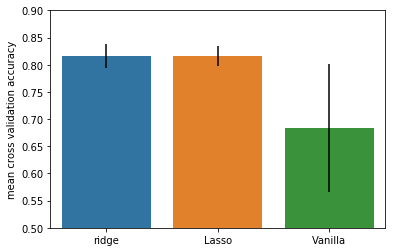

In [162]:
mcv=[]
vcv=[]
for xcv in cv:
    mcv.append(xcv.mean())
    vcv.append(xcv.std())
sns.barplot(['ridge','Lasso','Vanilla'],mcv,yerr=vcv)
plt.ylim([0.5,0.9])
plt.ylabel('mean cross validation accuracy')
print('mean accuracy \n',mcv)
print('std \n',vcv)

Lasso resulted in slightly better accuracy and smaller variance than ridge. Vanilla regresson had worst performance.  

## Conclusion
- Logistic regression with Lasso regularization performed the best among the three models.
- Since relatively many parameters remained even after feature selection process, Lasso successfully penalized low relavant terms and generated powerful model. 
- When investigating with Alpha parameter from 0.001 to 1, the smaller alpha led to better performance in both ridge and lasso regularization. 